<a href="https://colab.research.google.com/github/juandag97/Python-Notebooks/blob/master/Regression_Concrete_Data_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTAR LIBRERIAS REQUERIDAS Y DATASET RELACIONADO CON EL ANALISIS DE CONCRETO

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()

Saving Concrete_Data.xls to Concrete_Data.xls


In [3]:
data = pd.read_excel(io.BytesIO(uploaded['Concrete_Data.xls']))
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
print("-------------------RELEVANT INFORMATION---------------------")
print(data.info())
print(data.dtypes)

-------------------RELEVANT INFORMATION---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   i

##Se analiza si existen componentos nulos o no definidos en el conjunto de datos.

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(data.size)

,Total,%
"Concrete compressive strength(MPa, megapascals)",0,0.0
Age (day),0,0.0
Fine Aggregate (component 7)(kg in a m^3 mixture),0,0.0
Coarse Aggregate (component 6)(kg in a m^3 mixture),0,0.0
Superplasticizer (component 5)(kg in a m^3 mixture),0,0.0
Water (component 4)(kg in a m^3 mixture),0,0.0
Fly Ash (component 3)(kg in a m^3 mixture),0,0.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0,0.0
Cement (component 1)(kg in a m^3 mixture),0,0.0


##De acuerdo a la tabla mostrada, no existen valores null o NaN en el dataset.

In [ ]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
correlacion = data.corr(method='pearson')
correlacion

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


###Se analizan las variables que tienen el coeficiente de pearson mas cercanas a uno con respecto a la variable target que en este caso es: Concrete compressive strength(MPa, megapascals).
###Las variables identificadas son: Cement (component 1)(kg in a m^3 mixture), Superplasticizer (component 5)(kg in a m^3 mixture), y Age (day). Por lo cual se procede a realizar los scatter plots de estas variables sobre el componente de resistencia a la compresion.

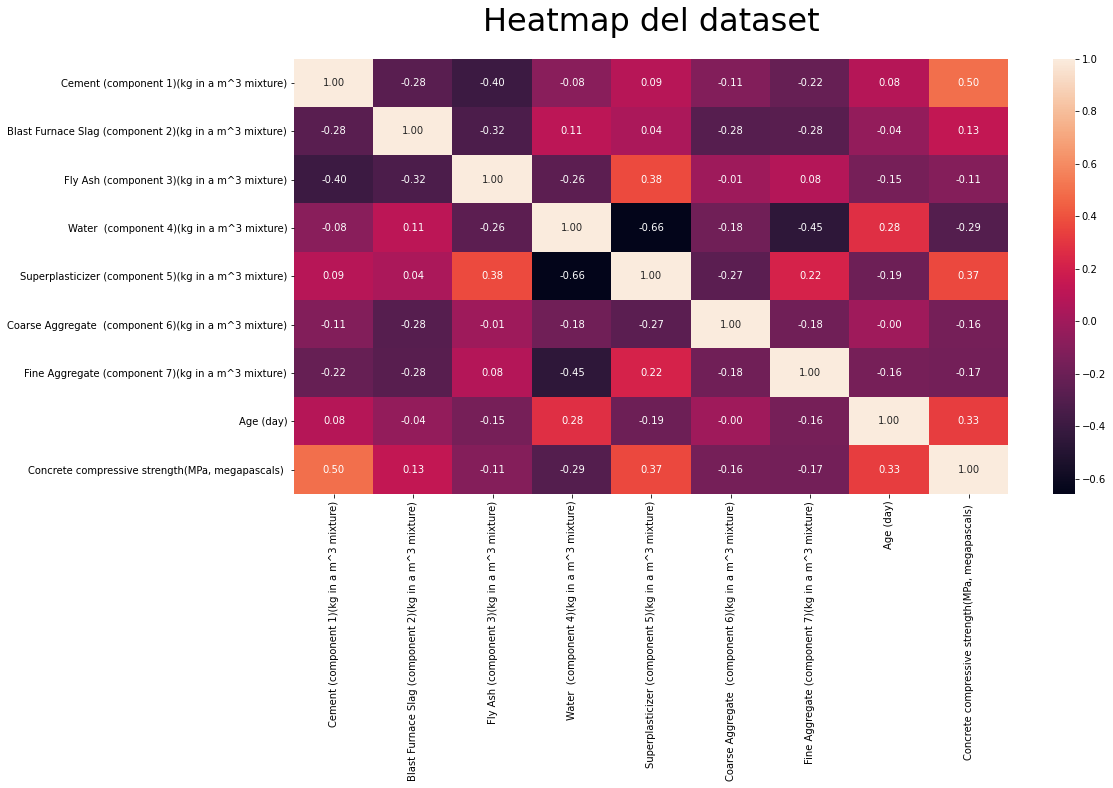

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
title = "Heatmap del dataset"
plt.title(title, fontsize=32)
ttl = ax.title
ttl.set_position([0.5,1.05])
sns.heatmap(correlacion, annot=True, fmt=".2f")
plt.show()

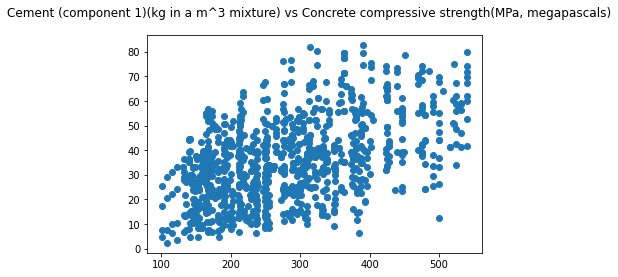

In [ ]:
plt.suptitle('Cement (component 1)(kg in a m^3 mixture) vs Concrete compressive strength(MPa, megapascals)')
plt.scatter(data['Cement (component 1)(kg in a m^3 mixture)'],data['Concrete compressive strength(MPa, megapascals) '])
plt.show()

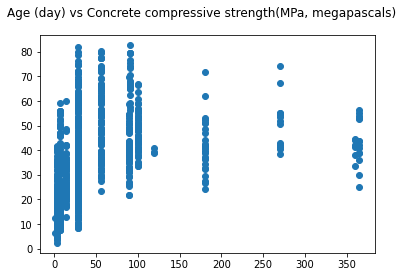

In [ ]:
plt.suptitle('Age (day) vs Concrete compressive strength(MPa, megapascals)')
plt.scatter(data['Age (day)'],data['Concrete compressive strength(MPa, megapascals) '])
plt.show()

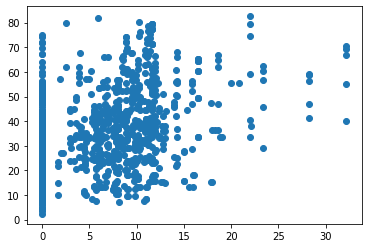

In [ ]:
plt.scatter(data['Superplasticizer (component 5)(kg in a m^3 mixture)'], data['Concrete compressive strength(MPa, megapascals) '])
plt.show()

##Otras graficas utiles

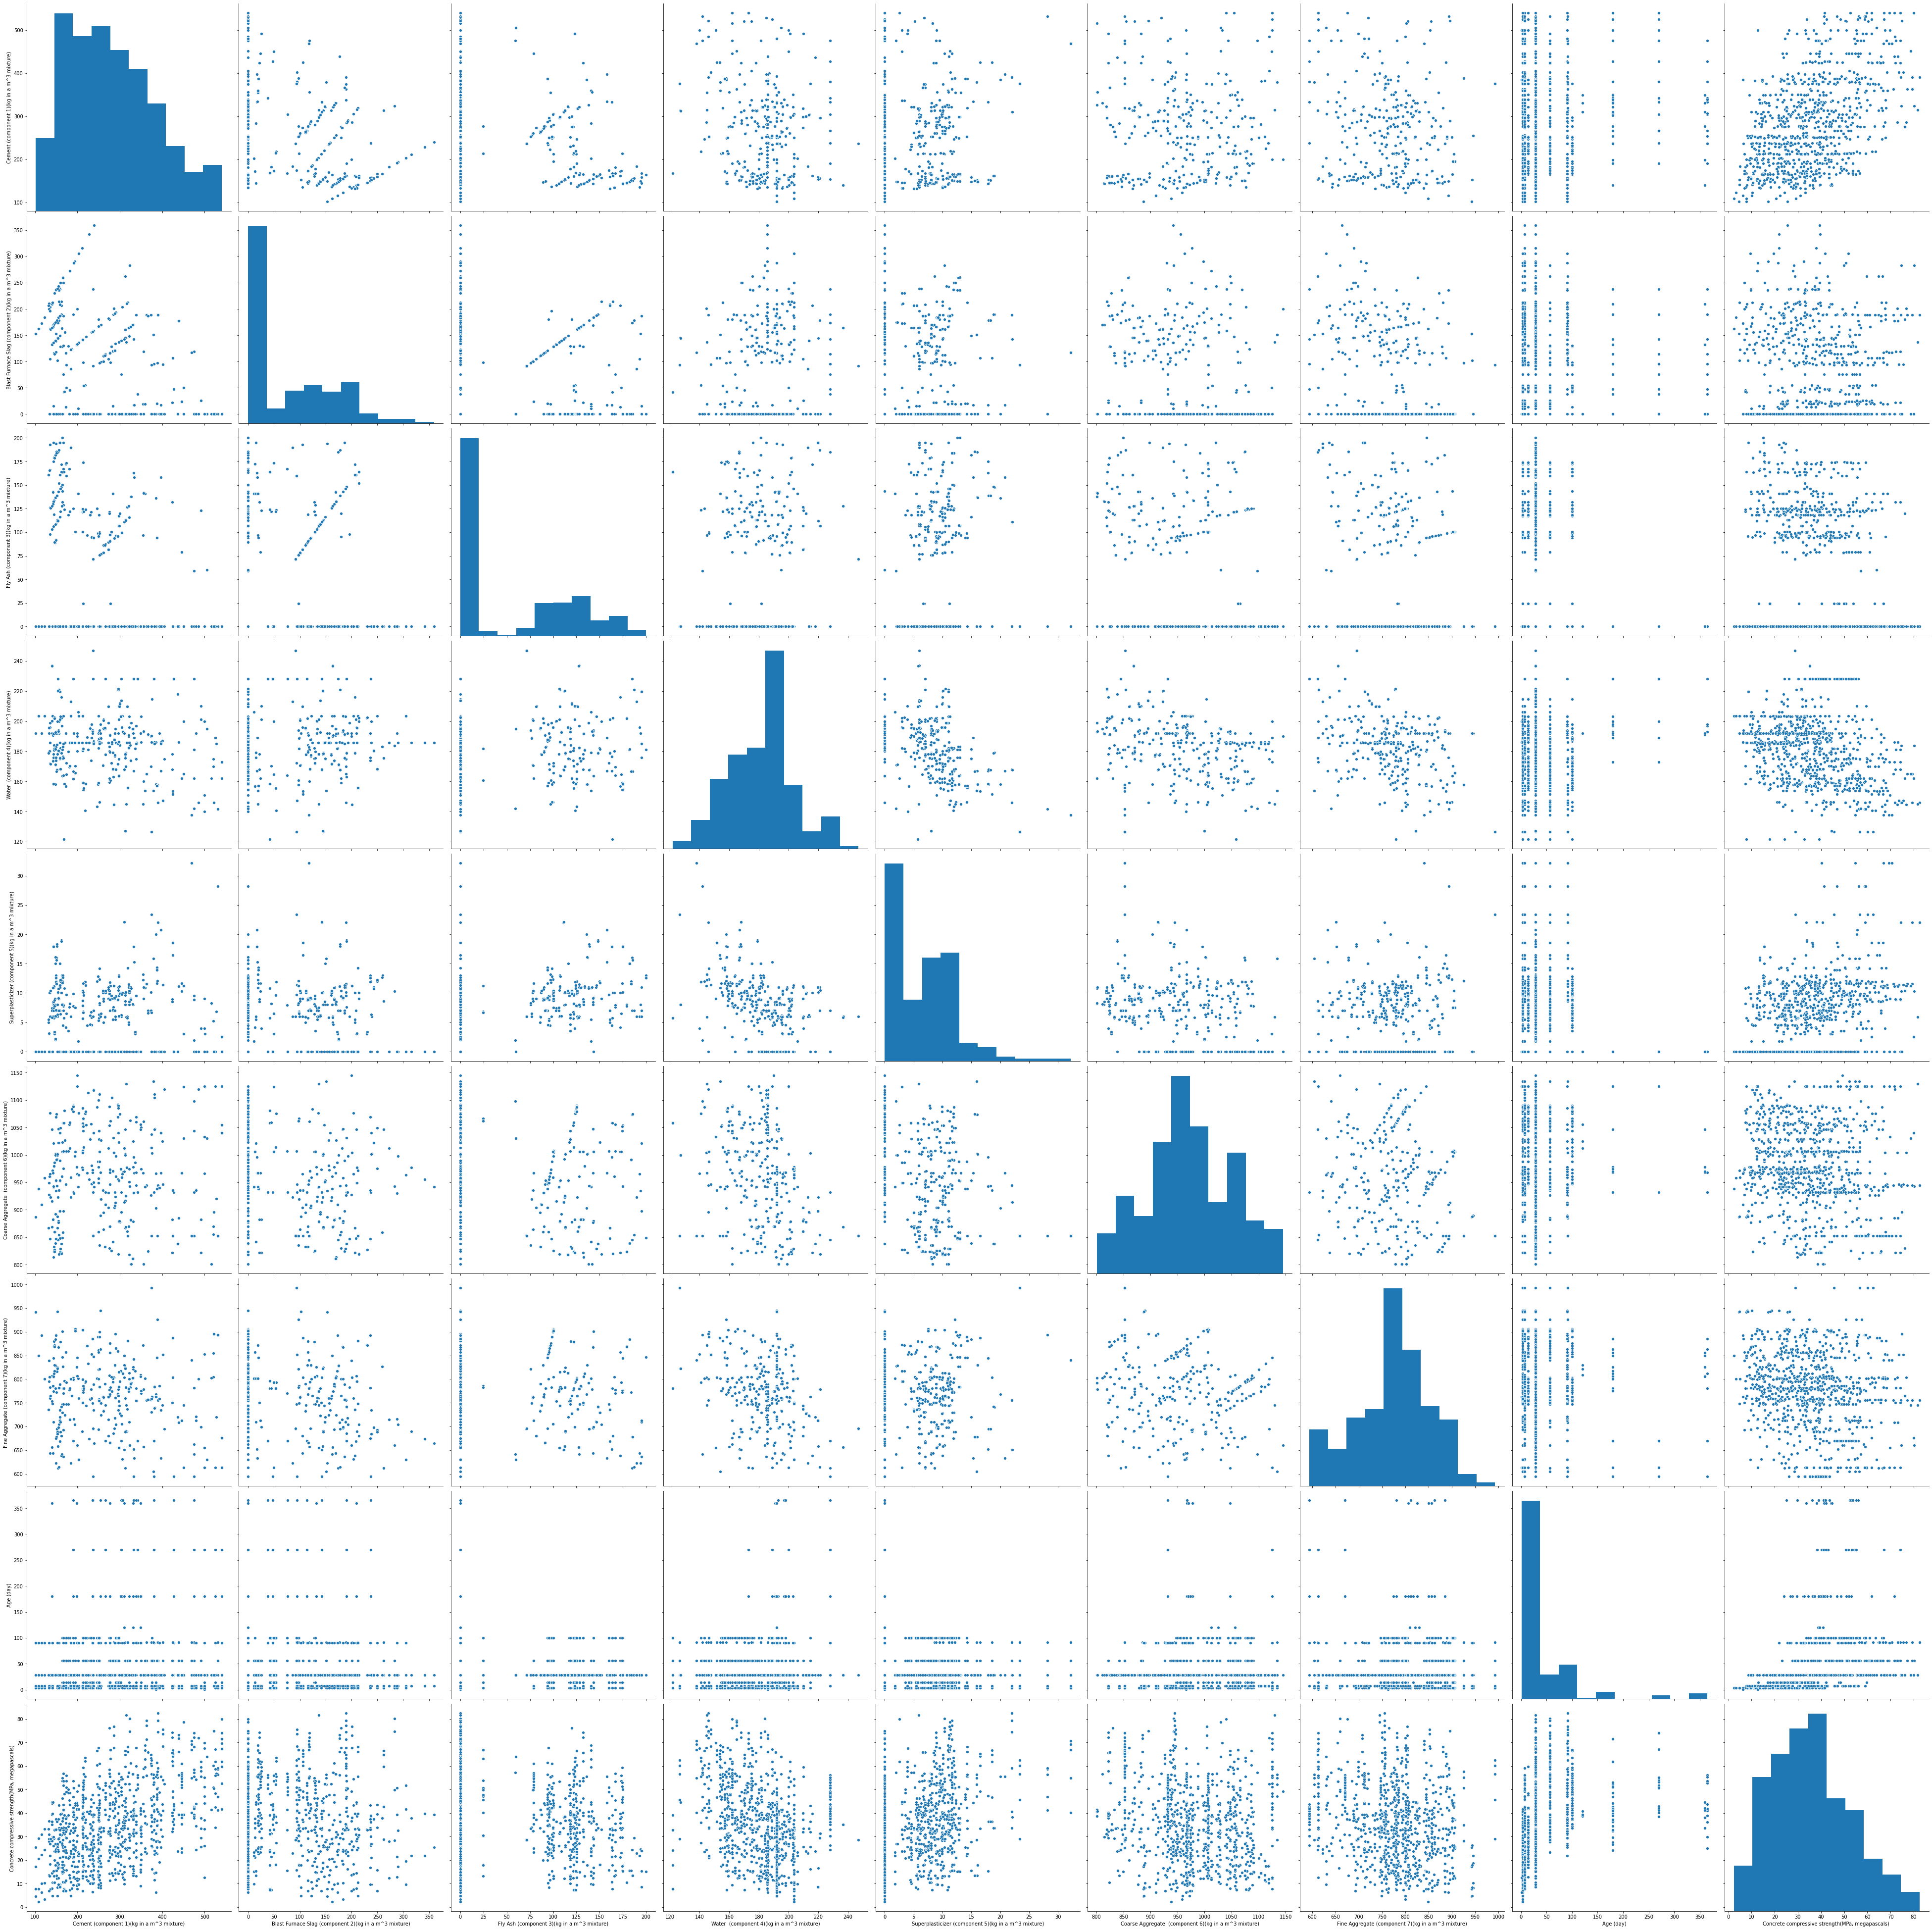

In [ ]:
sns.pairplot(data, height=6)
plt.show()

##Ya analizando los scatter plots, se detecta que existe una fuerte relacion entre el componente de cemento de la mezcla sobre la resistencia a la compresion, se analiza una relacion similar con el componente de superplastificante.


##Se procede a hacer un split para la generacion de los datasets de entrenamiento y de validacion.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data[['Cement (component 1)(kg in a m^3 mixture)']], data[['Concrete compressive strength(MPa, megapascals) ']], test_size = 0.3, random_state = 0)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.head()

(721, 1)
(309, 1)
(721, 1)
(309, 1)


,Cement (component 1)(kg in a m^3 mixture)
772,382.0
997,310.0
724,310.0
167,475.0
764,385.0


##Se entrena el modelo de regresion lineal con las variables resultantes del split.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(len(y_pred))
print("\nCoeficiente:\n",regressor.coef_)
print("\nIntercepto:\n",regressor.intercept_)

309

Coeficiente:
 [[0.07962636]]

Intercepto:
 [13.57457907]


##Se calcula el error de las predicciones, a partir del MSE y RMSE.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

13.755558151952686

In [ ]:
mse

189.21538007175198

In [ ]:
ecuation = data[['Cement (component 1)(kg in a m^3 mixture)']].dot(regressor.coef_) + regressor.intercept_

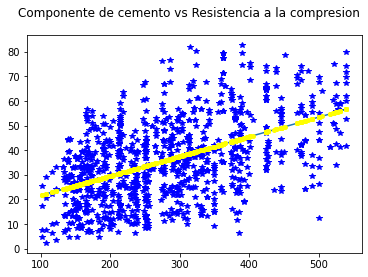

In [ ]:
plt.suptitle('Componente de cemento vs Resistencia a la compresion')
plt.plot(data[['Cement (component 1)(kg in a m^3 mixture)']],data['Concrete compressive strength(MPa, megapascals) '],'*b')
plt.plot(data[['Cement (component 1)(kg in a m^3 mixture)']],ecuation,marker="o", markersize="3", markeredgewidth="2",
         markerfacecolor="yellow", markeredgecolor="yellow")
plt.show()

##Se puede observar una tendencia lineal creciente entre el componente de cemento, y la resistencia a la compresion. Sin embargo se observa una alta dispersion, la cual se ve reflejada en el alto coeficiente de error. 
##Por ello se procedera a realizar una regresion lineal multivariable.

### Se define otro split de datasets de entrenamiento y de validacion. En este caso se tendra en cuenta el componente de cemento en la mezcla y el plastificante.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)']], data[['Concrete compressive strength(MPa, megapascals) ']], test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 2)
(206, 2)
(824, 1)
(206, 1)


In [ ]:
second_regressor = LinearRegression()
second_regressor.fit(X_train, y_train)
second_prediction = second_regressor.predict(X_test)
print("\nCoeficiente:\n",second_regressor.coef_)
print("\nIntercepto:\n",second_regressor.intercept_)


Coeficiente:
 [[0.0713388  0.91992813]]

Intercepto:
 [10.35929556]


In [ ]:
mse = mean_squared_error(y_test, second_prediction)
rmse = np.sqrt(mse)
rmse

12.392271195634523

###El RMSE disminuyo con el uso de la regresion lineal multiple. Ahora se realizara el entrenamiento y las predicciones a partir de 3 variables, en este caso se añadira la variable de año.

In [ ]:
second_ecuation = data[['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)']].dot(second_regressor.coef_.T) + second_regressor.intercept_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Age (day)']], data[['Concrete compressive strength(MPa, megapascals) ']], test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 3)
(206, 3)
(824, 1)
(206, 1)


In [ ]:
third_regressor = LinearRegression()
third_regressor.fit(X_train, y_train)
third_prediction = third_regressor.predict(X_test)
print("\nCoeficiente:\n",third_regressor.coef_)
print("\nIntercepto:\n",third_regressor.intercept_)


Coeficiente:
 [[0.06509826 1.12950211 0.10052438]]

Intercepto:
 [6.1744349]


In [ ]:
mse = mean_squared_error(y_test, third_prediction)
rmse = np.sqrt(mse)
rmse

10.888309238332504

###Finalmente se logro disminuir el RMSE a un valor de aproximadamente 10.883, el cual tiene un desempeño significativo respecto a la regresión lineal inicial, en la cual se tuvo en valor de 13,755 aproximadamente.

In [ ]:
third_ecuation = data[['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Age (day)']].dot(third_regressor.coef_.T) + third_regressor.intercept_

##Metodo procesamiento matricial

In [9]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [10]:
cemento = data[['Cement (component 1)(kg in a m^3 mixture)']]
concreto_c = data[['Concrete compressive strength(MPa, megapascals) ']]
superplastic = data[['Superplasticizer (component 5)(kg in a m^3 mixture)']]
age = data[['Age (day)']]
print(cemento.shape, superplastic.shape, age.shape, concreto_c.shape)

(1030, 1) (1030, 1) (1030, 1) (1030, 1)


In [11]:
sigma = np.prod(cemento.shape)
phi = np.c_[np.ones((sigma, 1)), cemento, superplastic, age]
print(phi)

[[  1.  540.    2.5  28. ]
 [  1.  540.    2.5  28. ]
 [  1.  332.5   0.  270. ]
 ...
 [  1.  148.5   6.1  28. ]
 [  1.  159.1  11.3  28. ]
 [  1.  260.9   8.6  28. ]]


In [12]:
#phi = np.c_[np.ones((1030,1)), cemento]
theta = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(concreto_c)
print(theta)

[[5.09765244]
 [0.06883552]
 [1.11164956]
 [0.09789979]]


In [16]:
#Datos de validacion 
xnew = np.linspace(25.333, 4321.32, sigma)
xnew = xnew.reshape(-1,1)

xnew2 = np.linspace(2, 23, sigma)
xnew2 = xnew2.reshape(-1,1)

xnew3 = np.linspace(34.21, 142.2, sigma)
xnew3 = xnew3.reshape(-1,1)

In [19]:
phi_new = np.c_[np.ones((sigma,1)), xnew, xnew2, xnew3]
print(phi_new)

[[1.00000000e+00 2.53330000e+01 2.00000000e+00 3.42100000e+01]
 [1.00000000e+00 2.95079145e+01 2.02040816e+00 3.43149466e+01]
 [1.00000000e+00 3.36828290e+01 2.04081633e+00 3.44198931e+01]
 ...
 [1.00000000e+00 4.31297017e+03 2.29591837e+01 1.41990107e+02]
 [1.00000000e+00 4.31714509e+03 2.29795918e+01 1.42095053e+02]
 [1.00000000e+00 4.32132000e+03 2.30000000e+01 1.42200000e+02]]


In [20]:
ypred = phi_new.dot(theta)
print(ypred)

[[ 12.41391372]
 [ 12.73425712]
 [ 13.05460052]
 ...
 [341.40658178]
 [341.72692518]
 [342.04726857]]


In [25]:
print(len(y_test), len(ypred), len(concreto_c))

309 1030 1030


In [28]:
mse = mean_squared_error(concreto_c, ypred)
rmse = np.sqrt(mse)
rmse

174.17893640740854

##Metodo gradiente descendente

###Construccion del modelo

In [31]:
X = cemento
Y = concreto_c
alpha = np.random.randn(4,1)
beta = np.array([[1], [1], [1], [1]])

In [39]:
m = 0
c = 0
L = 0.00001 # Learning Rate (Tasa de aprendizaje)
epochs = 3000000 # Numero de iteraciones para realizar el descenso del gradiente
n = float(1030) #Longitud de la variable cemento
s = len(X)
for i in range(epochs):
  Y_pred = phi.dot(theta)
  error = Y - Y_pred
  theta = theta + (2*L/s) * (phi.T.dot(error))


In [40]:
print(theta)

[[nan]
 [nan]
 [nan]
 [nan]]


In [41]:
ypred = phi_new.dot(theta)
print(ypred)

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [43]:
# mse = mean_squared_error(concreto_c, ypred)
# rmse = np.sqrt(mse)
# rmse

##Como conclusion el RMSE mas bajo se dio a partir del uso de la libreria scikit learn. En esta parte se tuvo un RMSE de 10.8883 analizando las 3 variables que presentaban mayor correlacion, lo cual es bastante significativo.